![title](LogoEPL.jpg)
<b><p style='text-align: center;'> Algorithms in Data Science  </p> </b>

<b><p style='text-align: center;'> A network-based study </p> </b>
<b><p style='text-align: center;'> Anna Karenina, a novel by the Russian author Leo Tolstoy </p> </b>

<i><p style='text-align: Center;'> Nima Farnoodian , Charles Rongione, Breno Tiburico</p> </i>


## Loading Necessary Packages

### Package Version:
<p>Scikit_learn 0.23.2</p>
<p>Numpy 1.19.2</p>
<p>Networkx 2.1</p>
<p>Matplotlib 3.1.2<p>

In [1]:
from networkx import *
import community 
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from math import ceil, floor
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors 
import time
import random
import sklearn.metrics as mt
import re
from nameparser.parser import HumanName

# Our claims in the report

In [2]:
HumanName('Vronsky’s mother')

<HumanName : [
	title: '' 
	first: 'Vronsky’s' 
	middle: '' 
	last: 'mother' 
	suffix: ''
	nickname: ''
]>

In [3]:
sen='When Countess Nordston ventured to hint that she had hoped for something better, Kitty was so angry and proved so conclusively that nothing in the world could be better than Levin, that Countess Nordston had to admit it, and in Kitty’s presence never met Levin without a smile of ecstatic dmiration. '
NAME = r"[A-Z][a-z]+"
Word_Names=re.findall( NAME, sen)
print(Word_Names)

['When', 'Countess', 'Nordston', 'Kitty', 'Levin', 'Countess', 'Nordston', 'Kitty', 'Levin']


## Preprocessing Phase: Information gathering and Network Creation
If you already have the network, you can pass this section and jump to the Load network section.

In [4]:
def float_round(num, places = 0, direction = floor):
    return direction(num * (10**places)) / float(10**places)

In [5]:
def name_correct(text):
    text=text.split()
    text=[i.lower().capitalize() for i in text]
    name=' '.join(i for i in text)
    return name

In [6]:
def get_name(name):
    extractedRelation={}
    TITLE = r"(?:[A-Z][a-z]*\.\s*)?"
    NAME1 = r"[A-Z][a-z]+,?\s+"
    MIDDLE_I = r"(?:[A-Z][a-z]*\.?\s*)?"
    NAME2 = r"[A-Z][a-z]+"
    #result=re.findall(TITLE + NAME1 + MIDDLE_I + NAME2, name)
    Fullname = HumanName(name)
    #print(name)
    if Fullname['middle']!='':
        returnName=[Fullname['first'],Fullname['middle'],Fullname['last']]
    else:
        returnName=[Fullname['first'],Fullname['last']]
    return returnName

In [7]:
f=open('Charecters.txt')
file=f.readlines()
allnames={}
for name_Uncorrect in file[1:]:
    Name_role=name_Uncorrect.split(',')
    #print(Name_role)
    role=Name_role[1]
    name=Name_role[0].split('/') 
    name_corrected=name_correct(name[0])
    #print(name_corrected)
    DetailName=get_name(name_corrected)
    if len(name)>1:
        Alias=name_correct(name[1])
        if Alias not in allnames:
            allnames[Alias]=[(name_corrected,role[:-2].strip())]
        
    for i in DetailName:
        if i!='':
            if i not in allnames:
                allnames[i]=[(name_corrected,role[:-2].strip())]
            else:
                allnames[i].append((name_corrected,role[:-2].strip()))


In [8]:
def find_most_relevant(word, index, result, allnames):
    findleft=False
    findright=False
    for i in allnames[word]:
        nameCandit=i[0]
        if index>0:
            if nameCandit.find(result[index-1])>=0:
                findleft=True
                
        if index<len(result)-1:
            if nameCandit.find(result[index+1])>=0:
                findright=True
        if findleft or findright:
            
            return nameCandit
            break
    if findleft==False or findright==False:
        for i in allnames[word]:
            nameCandit=i[0]
            desc=i[1]
            if index>0:
                if desc.find(result[index-1])>=0 or desc.find(result[index-1].lower())>=0:
                    findleft=True
            if index<len(result)-1:        
                if desc.find(result[index+1])>=0 or desc.find(result[index+1].lower())>=0:
                    findright=True
            if findleft or findright:
                return nameCandit
                break
    if findleft==False or findright==False:
        return False

allnames is a dictionary that stores all possible names in the book. Its keys are  names, nicknames, or family names, and its values are lists of all possible full names observed in the book which contains the key as name, nickname, or familiy name.

In [9]:
allnames

{'Agafea': [('Agafea Mihalovna', 'housekeeper at Pokrovskoe')],
 'Alexander': [('Prince Alexander Shtcherbatsky', 'father of Dolly')],
 'Alexandrovitch': [('Alexey Alexandrovitch Karenin', 'a minister of state')],
 'Alexandrovna': [('Princess Darya Alexandrovna', 'wife'),
  ('Princess Ekaterina Alexandrovna Shtcherbatsky',
   'their youngest daughter; later wife of Levin')],
 'Alexey': [('Alexey Alexandrovitch Karenin', 'a minister of state'),
  ('Count Alexey Kirillovitch Vronsky', 'a young officer')],
 'Andreevna': [('Varvara Andreevna', 'adopted daughter')],
 'Anna': [('Anna Arkadyevna Karenin', 'wife'), ('Anna Pavlovna', 'wife')],
 'Arkadyevitch': [('Prince Stepan Arkadyevitch Oblonsky', 'brother of Anna')],
 'Arkadyevna': [('Anna Arkadyevna Karenin', 'wife')],
 'Arseny': [('Arseny Lvov', 'husband')],
 'Baroness': [('Baroness Shilton', 'friend of Petritsky')],
 'Betsy': [('Princess Betsy Tverskoy', 'cousin of Vronsky')],
 'Darya': [('Princess Darya Alexandrovna', 'wife')],
 'Dmitri

In [10]:
# Loading Book
with open("Anna_Karenina.txt", "r", encoding='UTF-8') as input:
    file_separated = input.read().split("\n\n")  

In [11]:
len(file_separated)

7705

In [12]:
Paranames={}
counter=0
paraWife=[]
praraWord=0
paranameCounter=0
for para in file_separated:
    NAME = r"[A-Z][a-z]+"
    result=re.findall( NAME, para)
    parawords=[]
    for i in range(len(result)):
        word=result[i]
        if word in allnames:
            if len(allnames[word])==1:
                parawords.append(allnames[word][0][0])
            else:
                NameInterpreted=find_most_relevant(word,i , result, allnames)
                if NameInterpreted:
                    parawords.append(NameInterpreted)
                else: 
                    if word=='Anna': # Anna is the main character and is mentioned frequently 
                        parawords.append(allnames[word][0][0])
                    else:
                        parawords.append(allnames[word][0][0])
    
    parawords=list(set(parawords))
    if parawords!=[] and len(parawords)>1:
        praraWord+=len(para.split())
        Paranames[counter]=parawords
        paranameCounter+=len(parawords)
        if 'Wife'in parawords:
            paraWife.append(counter)
    counter+=1
                    
                

In [13]:
Paranames

{37: ['Prince Stepan Arkadyevitch Oblonsky', 'Princess Darya Alexandrovna'],
 45: ['Prince Stepan Arkadyevitch Oblonsky', 'Princess Darya Alexandrovna'],
 57: ['Prince Stepan Arkadyevitch Oblonsky', 'Marya Philimonovna'],
 59: ['Prince Stepan Arkadyevitch Oblonsky', 'Grisha', 'Tanya'],
 87: ['Princess Darya Alexandrovna', 'Anna Arkadyevna Karenin'],
 116: ['Princess Darya Alexandrovna', 'Anna Arkadyevna Karenin'],
 122: ['Princess Darya Alexandrovna', 'Marya Philimonovna'],
 128: ['Prince Stepan Arkadyevitch Oblonsky',
  'Alexey Alexandrovitch Karenin',
  'Anna Arkadyevna Karenin'],
 149: ['Prince Stepan Arkadyevitch Oblonsky', 'Konstantin Dmitrievitch Levin'],
 152: ['Prince Stepan Arkadyevitch Oblonsky',
  'Konstantin Dmitrievitch Levin',
  'Nikolay Levin'],
 153: ['Prince Stepan Arkadyevitch Oblonsky', 'Konstantin Dmitrievitch Levin'],
 154: ['Prince Stepan Arkadyevitch Oblonsky', 'Konstantin Dmitrievitch Levin'],
 155: ['Prince Stepan Arkadyevitch Oblonsky', 'Konstantin Dmitrievitc

In [14]:
print('The number of paragraph: ' + str(counter))
print('The number of paragraph in which at least two charachters are mentioned: ' + str(len(Paranames)))
print('The average number of words in the paragraphs: ' + str(float_round(praraWord/len(Paranames),3)))
print('The average number of Names in the paragraphs: ' + str(float_round(paranameCounter/len(Paranames),3)))

The number of paragraph: 7705
The number of paragraph in which at least two charachters are mentioned: 1561
The average number of words in the paragraphs: 87.427
The average number of Names in the paragraphs: 2.417


In [15]:
f=open('ParagraphName.txt','w+')
for i in Paranames:
    text=','.join(Paranames[i])
    text=text+'\n'
    f.write(text)
f.close()

In [16]:
adjL={}
namelist=[]
for i in Paranames:
    namelist+=Paranames[i]               

In [17]:
len(set(namelist))

44

In [18]:
namelist

['Prince Stepan Arkadyevitch Oblonsky',
 'Princess Darya Alexandrovna',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Princess Darya Alexandrovna',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Marya Philimonovna',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Grisha',
 'Tanya',
 'Princess Darya Alexandrovna',
 'Anna Arkadyevna Karenin',
 'Princess Darya Alexandrovna',
 'Anna Arkadyevna Karenin',
 'Princess Darya Alexandrovna',
 'Marya Philimonovna',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Alexey Alexandrovitch Karenin',
 'Anna Arkadyevna Karenin',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Konstantin Dmitrievitch Levin',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Konstantin Dmitrievitch Levin',
 'Nikolay Levin',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Konstantin Dmitrievitch Levin',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Konstantin Dmitrievitch Levin',
 'Prince Stepan Arkadyevitch Oblonsky',
 'Konstantin Dmitrievitch Levin',
 'Sergey Ivanovitch Koznishev',
 'Konstantin Dmitrievitch Levin',
 

In [19]:
f=open('Charecters - Sex.txt')
Name_sexList=f.readlines()
Sex={}
for name in Name_sexList:
    name=name.split(',') 
    if name_correct(name[0]) in namelist:
        if name[1][:-1].strip()=='F':
            Sex[name_correct(name[0])]=0
        else:
            Sex[name_correct(name[0])]=1

In [20]:
f=open('ParagraphName.txt')
allNodes=f.readlines()
Nodes=[]
#Network_dict={}
for line in allNodes:
    line=line[:-1]
    Names=line.split(',')
    for name in Names:
        #print(name)
        Nodes.append(name)
Nodes=list(set(Nodes))

In [21]:
G = nx.Graph()
G.add_nodes_from(Nodes)
for node in G:
    #print(G.node[node])
    G.nodes[node]['Sex']=Sex[node]
f=open('ParagraphName.txt')
allNodes=f.readlines()
for line in allNodes:
    line=line[:-1]
    Names=line.split(',')
    for name in Names:
        copy_name=Names.copy()
        copy_name.pop(copy_name.index(name))
        for copy in copy_name:
            if copy not in G[name]:
                G.add_edge(name,copy)
                #Network_dict[name].append(copy)


In [22]:
G.nodes['Varya']

{'Sex': 0}

In [23]:
len(G.nodes())

44

In [24]:
G.node['Varya']

{'Sex': 0}

In [25]:
## Writing the network G into a csv file. It is an edge list representation of the network.
f=open('edge_list_Anna.csv','w+')
for i in G: 
    n=list(G[i])
    for j in n:
        #print(i+','+j)
        f.write(i+','+j+'\n')
f.close()

In [26]:
# Write .gexf file for gephi.
nx.write_gexf(G, "Anna Karenina.gexf")

### Loading Network

In [28]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')

# Network properties:

### Clustering Coefficient

In [27]:
CL=clustering(G)

In [28]:
CLSorted=sorted(CL.items(), key=lambda item: item[1], reverse=True)
print ('Six characters with the highest clustering coefficient:' )
highCluster=[]
for i in range(6):
    print(CLSorted[i][0]+': ' + str(float_round(CLSorted[i][1],3))+ ' /Degree: ' +str(len(G[CLSorted[i][0]])))
    highCluster.append(CLSorted[i][0])
print('\n')
print('Average Clustering Coefficient: '+ str(float_round(average_clustering(G),3)))

Six characters with the highest clustering coefficient:
Kritsky: 1.0 /Degree: 3
Madame Sviazhskaya: 1.0 /Degree: 2
Mlle. Linon: 1.0 /Degree: 6
Captain Kamerovsky: 1.0 /Degree: 3
Marya Philimonovna: 1.0 /Degree: 5
Varya: 0.952 /Degree: 7


Average Clustering Coefficient: 0.726


In [29]:
G['Marya Philimonovna']

AtlasView({'Prince Stepan Arkadyevitch Oblonsky': {}, 'Princess Darya Alexandrovna': {}, 'Tanya': {}, 'Konstantin Dmitrievitch Levin': {}, 'Princess Ekaterina Alexandrovna Shtcherbatsky': {}})

In [30]:
len(G['Tanya'])

10

C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


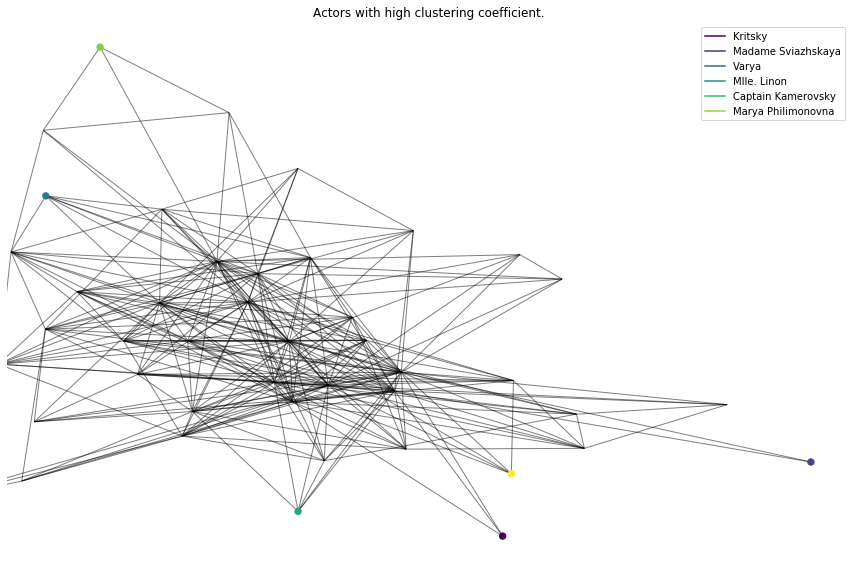

In [31]:
# Using a figure to use it as a parameter when calling nx.draw_networkx
HighCluster_Dict={}
Node_ID=0
for node in G:
    if node in highCluster:
        HighCluster_Dict[node]=Node_ID
        Node_ID+=1

jet = cm = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=max(HighCluster_Dict.values())+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
for label in HighCluster_Dict:
    ax.plot([0],[0],
            color=scalarMap.to_rgba(HighCluster_Dict[label]),
            label=label)

pos = spring_layout(G) 
#print(list(HighCluster_Dict.values()))
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
draw_networkx_nodes(G, pos, HighCluster_Dict.keys(), node_size=40, 
                       node_color=list(HighCluster_Dict.values()),ax=ax)
draw_networkx_edges(G, pos, alpha=0.5)
''''''
plt.axis('off')
f.set_facecolor('w')

plt.legend(loc='best')
plt.title('Actors with high clustering coefficient.')

f.tight_layout()

plt.show()

### Degree Distribution and Assortativity

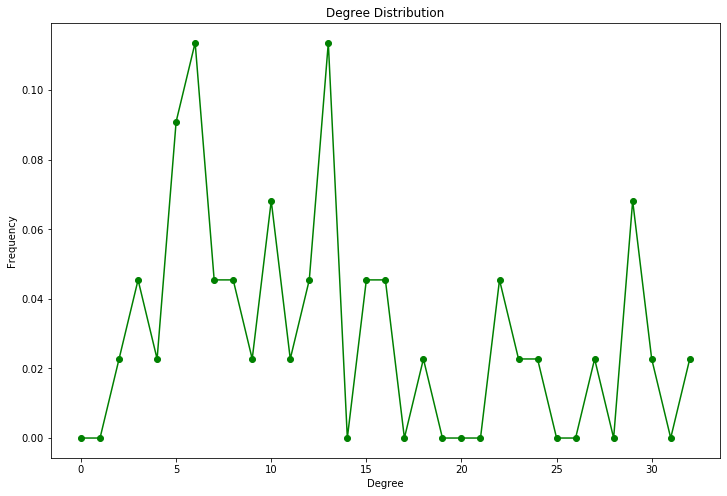

In [32]:
degree_freq = degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
total=sum(degree_freq[0:])
degree_freq=[i/total for i in degree_freq]
plt.plot(degrees[0:], degree_freq[0:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.savefig('degreeDist.png')
plt.show()


In [33]:
deg=dict(G.degree)
deg=sorted(deg.items(), key=lambda item: item[1], reverse=True)
print ('Six high-degree characters:' )
highdegree=[]
for i in range(6):
    print(deg[i][0]+': ' + str(deg[i][1]))
    highdegree.append(deg[i][0])
print('\n')
degrees = G.degree()
j=0
for i in G:
    j+=int(G.degree[i])
print('Average Degree: ' +str(float_round(j/len(G), 3) ))

Six high-degree characters:
Konstantin Dmitrievitch Levin: 32
Princess Ekaterina Alexandrovna Shtcherbatsky: 30
Prince Stepan Arkadyevitch Oblonsky: 29
Anna Arkadyevna Karenin: 29
Count Alexey Kirillovitch Vronsky: 29
Princess Darya Alexandrovna: 27


Average Degree: 13.136


C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


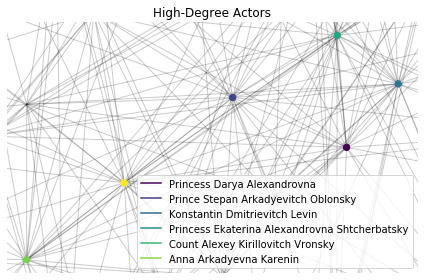

In [36]:
# Using a figure to use it as a parameter when calling nx.draw_networkx
High_Dict={}
Node_ID=0
for node in G:
    if node in highdegree:
        High_Dict[node]=Node_ID
        Node_ID+=1

jet = cm = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=max(High_Dict.values())+1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for label in High_Dict:
    ax.plot([0],[0],
            color=scalarMap.to_rgba(High_Dict[label]),
            label=label)

pos = spring_layout(G) 
#print(list(HighCluster_Dict.values()))
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
draw_networkx_nodes(G, pos, High_Dict.keys(), node_size=40, 
                       node_color=list(High_Dict.values()),ax=ax)
draw_networkx_edges(G, pos, alpha=0.2)
''''''
plt.axis('off')
f.set_facecolor('w')

plt.legend(loc='best')
plt.title('High-Degree Actors')

f.tight_layout()

plt.show()

In [37]:
print('Degree Assortativity Coefficient: '+ str( float_round(degree_assortativity_coefficient(G),3)))

Degree Assortativity Coefficient: -0.248


The negative value indicates that the network is degree disassortative, meaning that high-degree nodes in the network associate preferentially with low-degree nodes. 

### Connectivity

In [38]:
print( 'The network has ' + str(number_connected_components(G)) + ' Connected Component(s)')

The network has 1 Connected Component(s)


In [39]:
print( 'Is the network directed? ' + str(G.is_directed()))

Is the network directed? False


In [40]:
print('Is the network multigraph? ' + str(G.is_multigraph()))

Is the network multigraph? False


### Homophily: What if we consider gender?

C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


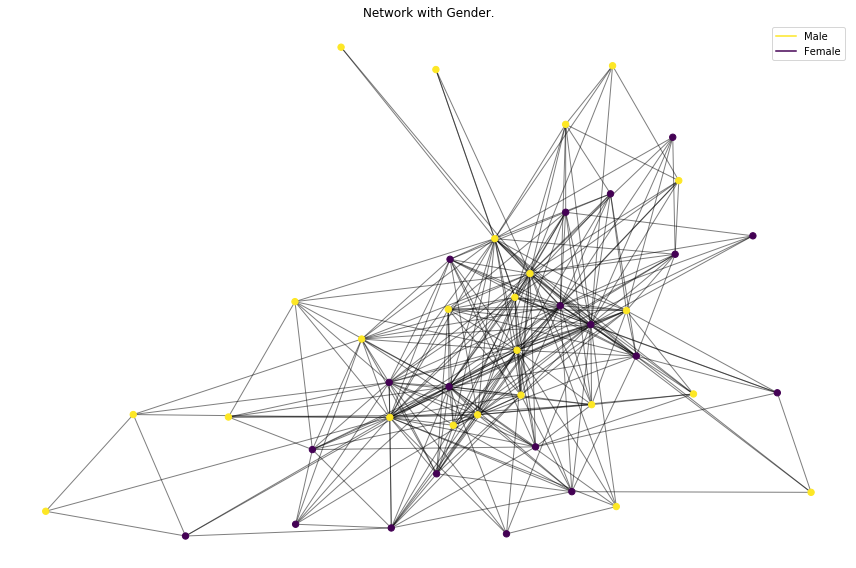

In [41]:
# Using a figure to use it as a parameter when calling nx.draw_networkx
Gender={'Male':1,'Female':0}

jet = cm = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=max(Gender.values()))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
for label in Gender:
    ax.plot([0],[0],
            color=scalarMap.to_rgba(Gender[label]),
            label=label)

pos = spring_layout(G) 
#print(list(HighCluster_Dict.values()))
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
draw_networkx_nodes(G, pos, Sex.keys(), node_size=40, 
                       node_color=list(Sex.values()),ax=ax)
draw_networkx_edges(G, pos, alpha=0.5)
''''''
plt.axis('off')
f.set_facecolor('w')

plt.legend(loc='best')
plt.title('Network with Gender.')

f.tight_layout()
plt.savefig('Gender-Based.png')
plt.show()

In [42]:
print('Modularity: ' +str(float_round(community.modularity(Sex, G, weight='weight'),3)))

Modularity: 0.011


<b>Homopholy and Assortativity based on actors' gender</b>: A cursory look at  the Modularity calculated according to the gender of the actors (Characters) in the network and the depicted network unveils that no strong gender-assortativity exits between actors. Generally, the story of the book <b><i>"Anna Karenina"</i></b> is fully composed of <i>Love</i>, <i>Affair</i>, <i>Extramarital Relationship</i>, and <i>infidelity</i>. Therefore, the network represents a sexual contact among actors. In other words, in a paragraph, the chance to see the names with differnt gender is more than to see same-sex names. However, based on the modularity, the network seems to be randomly mixed if the gender of the actors is taken into account.

# Community Detection Algorithm

To find the communities in the Network, we use the <b><i>Louvain Algorithm</i></b> as suggested although it suffers from Modularity Resolution Limit problem. To efficiently perform Louvain algorithm on our Network, we utilize <i><b>python-louvain package </b></i> that can be simply installed using pip install command. You will find documentation about this package at http://python-louvain.readthedocs.io/. Notice: Although this package is name <i><b>python-louvain package </b></i>, it it imported as <i><b>community </b></i>.

In [69]:
partition = community.best_partition(G)


In [70]:
print('The network includes ' + str(len(set(partition.values()))) + ' communities')

The network includes 4 communities


C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


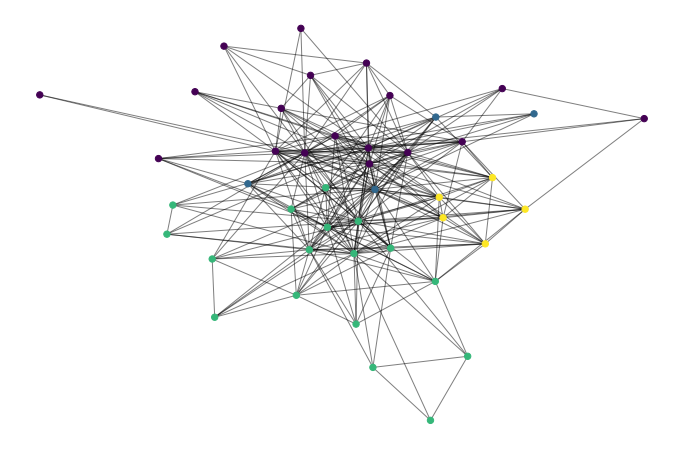

In [71]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
pos = spring_layout(G) 

cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()),ax=ax)
draw_networkx_edges(G, pos, alpha=0.5)
#f.tight_layout()
plt.axis('off')
f.set_facecolor('w')
plt.savefig('Communities.png')
plt.show()

In [72]:
print('Modularity: ' +str(community.modularity(partition, G, weight='weight')))

Modularity: 0.19079632667233387


The low Modularity for our Network indicates the inseparability of the network.

# K-core decomposition


In [47]:
def K_core_function(Network, K):
    
    degree_central = degree_centrality(Network)
    sorted_nodes_tuples = sorted(degree_central.items(), key=lambda x: x[1])

    sorted_nodes = []
    for i in sorted_nodes_tuples:
        sorted_nodes.append(i[0])

    for node in sorted_nodes:
        if Network.degree[node] < K:
            Network.remove_node(node)
    
    return Network

def Nice_Network_plot(Network):
    pos = layout.spring_layout(Network)

    fig, ax = plt.subplots(figsize = (15,10))

    degrees = Network.degree() 
    nodes = Network.nodes()

    n_color = np.asarray([degrees[n] for n in nodes])
    sc = draw_networkx_nodes(G, pos, nodelist=nodes, node_color=n_color, cmap='plasma', ax=ax, node_size=100)
    draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

    color = fig.colorbar(sc)
    color.ax.set_title('Degree of the node')
    ax.set_title('K-Core Decomposition')
    
    plt.show()

In [48]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')

We here choose K=10, therefore, no node with degree=<10 will remain in the network. 

C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


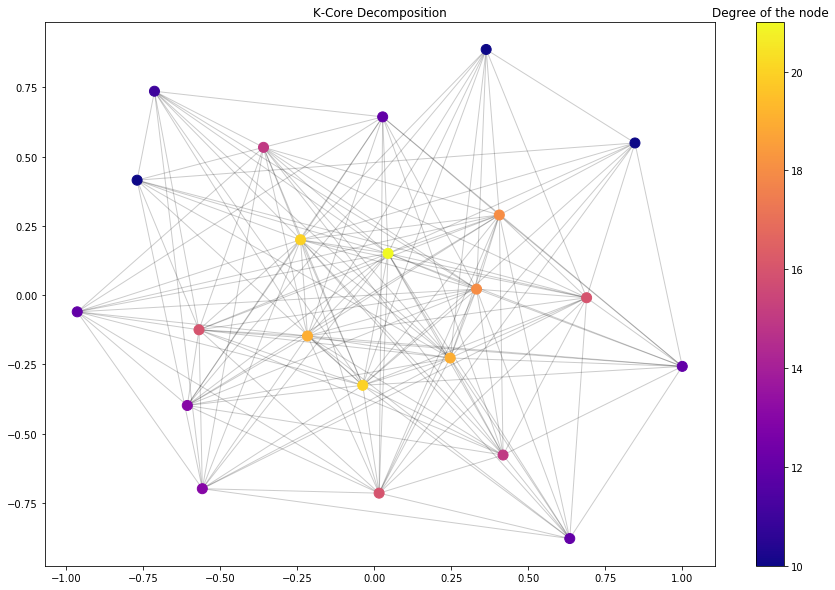

In [49]:
b = K_core_function(G, K = 10)
Nice_Network_plot(b)

# Barabási–Albert Model

In [50]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')
G2=barabasi_albert_graph(len(G.nodes),8)

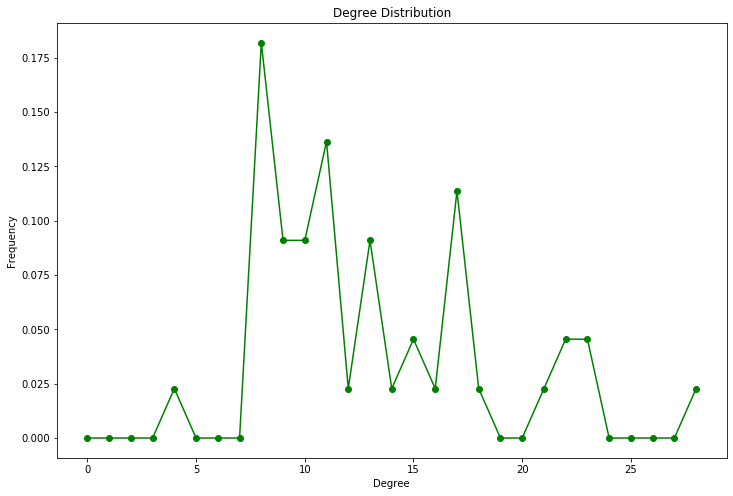

In [51]:
degree_freq = degree_histogram(G2)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
total=sum(degree_freq[0:])
degree_freq=[i/total for i in degree_freq]
plt.plot(degrees[0:], degree_freq[0:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.savefig('Barbasi=Degree.png')


In [52]:
j=0
for i in G2:
    j+=int(G2.degree[i])
print('Average Degree: ' +str(float_round(j/len(G2), 3) ))
print('Average Clustering Coefficient: '+ str(float_round(average_clustering(G2),3)))
print('Degree Assortativity Coefficient: '+ str( float_round(degree_assortativity_coefficient(G2),3)))

Average Degree: 13.09
Average Clustering Coefficient: 0.389
Degree Assortativity Coefficient: -0.087


Like our network, this BA network is degree disassortative.

In [53]:
partition2 = community.best_partition(G2)
print('Modularity for BA Network: ' +str(community.modularity(partition2, G2, weight='weight')))
print('The network includes ' + str(len(set(partition2.values()))) + ' communities')

Modularity for BA Network: 0.16404441550925927
The network includes 5 communities


Like our Network, this BA netword is inseparabile.

C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


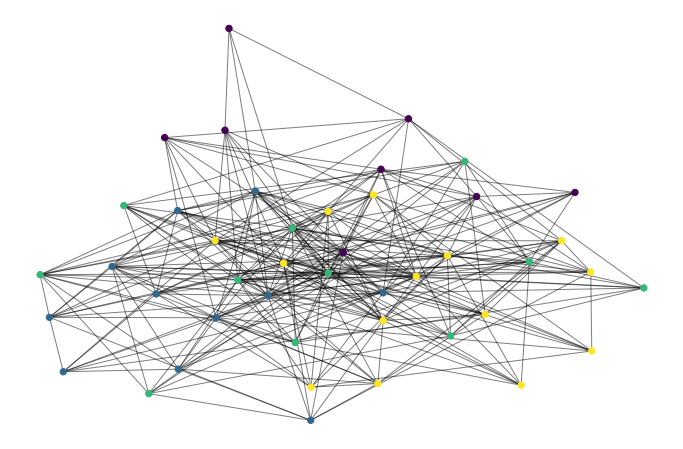

In [54]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
pos = spring_layout(G2) 

cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
draw_networkx_nodes(G2, pos, partition2.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition2.values()),ax=ax)
draw_networkx_edges(G2, pos, alpha=0.5)
#f.tight_layout()
plt.axis('off')
f.set_facecolor('w')
plt.savefig('BA-Communities.png')
plt.show()

In [55]:
len(list(partition2.values()))

44

In [56]:
MIS=mt.mutual_info_score(list(partition.values()), list(partition2.values()), contingency=None)

In [57]:
print('The mutual information score is '+ str(float_round(MIS, 3))+'.')
print('The Mutual Information is a measure of the similarity between two labels of the same data.')
print('This low MI indicates a significant difference between the community structures of BA Network and our Network.')

The mutual information score is 0.173.
The Mutual Information is a measure of the similarity between two labels of the same data.
This low MI indicates a significant difference between the community structures of BA Network and our Network.


# Maximization Influence and Diffusion

## Extraction k-most influential nodes: Greedy Algorithm

In [134]:
from networkx.classes.function import set_node_attributes, get_node_attributes

### The following code is the cascade SIR Model

In [34]:
def cascade_model(G, starting_nodes, time, p_infect, recovery_time, plots = False):
    """
    Input : 
        - G : NetworkX object
        - starting_nodes : array, the nodes which are the start of the spreading phenomenon
        - time : array, the time vector
        - p_infect : int, the probability of a node to get infected for each of his infected neighbors
        - recovery_time : int the number of steps of times required to be cured
        - plots : bool, default(False) if True, return a visualisation of each step of time. (check Nice_Infected_Network_plot)
    
    Output : 
        - The updated NetworkX object
        
    """

    infected_nodes = []
    
    for t in time:
        
        
        # Set the starting node
        if t == 0:
            
            for start in starting_nodes:
            
                set_node_attributes(G, values = {start: 1}, name = 'infected')
                set_node_attributes(G, values = {start: 0}, name = 'infected_timing')
        else:
            
            
        
            # find all the infected nodes
            for node in list(get_node_attributes(G, name = 'infected').items()):
                if node[0] not in infected_nodes:
                    
                    infected_nodes.append(node[0])
            
                # find their neighbors
                for neighbor in list(G.neighbors(node[0])):
                    
                        # make sure we don't try to infect already infected nodes
                        if neighbor not in infected_nodes: 
                    
                        # the neighbor of the infected node gets infected with a probability of p_infect
                            if np.random.uniform(0,1) <= p_infect:
                                set_node_attributes(G,values = {neighbor : 1}, name = 'infected')
                                set_node_attributes(G,values = {neighbor : t}, name = 'infected_timing')
            
           
            # If the node has been infected for (recovery time) steps of time, it recovers
            for node in infected_nodes:
                
                if (G.nodes[node]['infected_timing']) + recovery_time == t :
                    set_node_attributes(G,values = {node : 1}, name = 'recovered')
            
        # visualize each step of time
        if plots == True:
            Nice_Infected_Network_plot(Network = G)
    
    return G

   


def Nice_Infected_Network_plot(Network):
    pos = nx.layout.kamada_kawai_layout(Network)

    fig, ax = plt.subplots(figsize = (6,3))

    degrees = Network.degree() 
    nodes = Network.nodes()
    
    infected_nodes = []
    for node in list(get_node_attributes(Network, name = 'infected').items()):
        infected_nodes.append(node[0])
    
    recovered_nodes = []
    for node in list(get_node_attributes(Network, name = 'recovered').items()):
        recovered_nodes.append(node[0])
        
    

    n_color = np.asarray([degrees[n] for n in nodes])
    sc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=n_color, cmap='plasma', ax=ax, node_size=100)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)
    nx.draw_networkx_nodes(G, pos, nodelist=infected_nodes, node_color='black', node_size=110)
    nx.draw_networkx_nodes(G, pos, nodelist=recovered_nodes, node_color='green', node_size=100)
    
    color = fig.colorbar(sc)
    color.ax.set_title('Degree of the node')
    ax.set_title('My network')
    
    plt.show()


In [74]:
def ICM(G,S,p=0.5,m=100,Plot=True):
    """
    Input:  graph object, set of seed nodes, propagation probability
            and the number of Monte-Carlo simulations
    Output: average number of nodes influenced by the seed nodes
    """
    
    # Loop over the Monte-Carlo Simulations
    spread = []
    Average_time_infected=[]
    for i in range(m):
        
        new_active, A = S[:].copy(), S[:].copy()
        time_infected=[]
        time_counter=1
        while new_active:

            new_ones = []
            for node in new_active:
                
                # Determine neighbors that become infected
                np.random.seed(i)
                success = np.random.uniform(0,1,len(list(G[node]))) < p
                new_ones += list(np.extract(success, list(G[node])))
            new_active = list(set(new_ones) - set(A))
            
            A += new_active
            time_infected.append(len(A))
            time_counter+=1
        
        spread.append(len(A))
        Average_time_infected.append(time_infected)
    maximum=0
    nodeNum=len(G.nodes)
    if Plot==True:
        for i in Average_time_infected:
            if len(i)>0:
                maximum=len(i)
        Average_Time={}
        for i in range(maximum):
            Average_Time[i+1]=0
        for j in range(maximum):
            summation=0
            count=0
            for i in Average_time_infected:
                if len(i)-1>=j:
                    if j!=0:
                        #summation+=((nodeNum-i[j])/nodeNum)+Average_Time[j]
                        summation+=(1-((nodeNum-i[j])/nodeNum))
                    else:
                        summation+=(1-((nodeNum-i[j])/nodeNum))
                    count+=1
            if count!=0:
                Average_Time[j+1]=summation/count
        if 0 in list(Average_Time.values()):
            idx=list(Average_Time.values()).index(0)
            plt.plot(list(Average_Time.keys())[:idx],list(Average_Time.values())[:idx])
        else:
            plt.plot(list(Average_Time.keys()),list(Average_Time.values()))
        plt.title('The average fraction of Actors who got infected over time t')
        plt.ylabel('The average fraction of Actors')
        plt.xlabel('Time t')
        plt.savefig('spread.png')
        plt.show()
    return(np.mean(spread))

In [38]:
def greedy(G,k,p=0.1,mc=100):
    """
    Input:  graph object, number of seed nodes
    Output: optimal seed set, resulting spread, time for each iteration
    """

    S, spread, timelapse, start_time = [], [], [], time.time()
    
    for _ in range(k):
        best_spread = 0
        for j in set(G.nodes)-set(S):
            # Calculate ICM for the new seed
            s = ICM(G,S + [j],p,mc,Plot=False)

            if s > best_spread:
                best_spread, node = s, j

        S.append(node)
        
        spread.append(best_spread)
        timelapse.append(time.time() - start_time)

    return(S,spread,timelapse)

In [71]:
result=greedy(G,int(np.round(0.05*len(G.nodes))),p=0.1,mc=100)

In [72]:
print(str(int(np.round(0.05*len(G.nodes))))+'-Most influential actors/characters:')
for i in range(len(result[0])):
    print(result[0][i]+ '/ Influence: ' +str(result[1][i])+'/ Degree: ' + str(len(G[result[0][i]])))

2-Most influential actors/characters:
Prince Stepan Arkadyevitch Oblonsky/ Influence: 16.84/ Degree: 29
Prince Alexander Shtcherbatsky/ Influence: 18.48/ Degree: 18


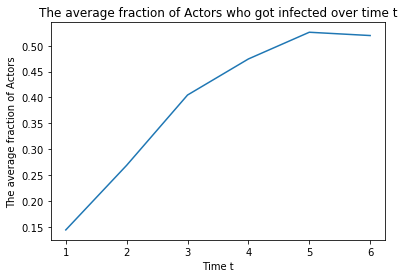

In [75]:
kres=ICM(G,result[0],p=0.1,m=100,Plot=True)

In [63]:
print('IMC score for k-Most Influential Actors: '+ str(kres))

IMC score for k-Most Influential Actors: 18.48


### SIR Model for k-most Influential actors 

In [50]:
   
t0 = 0
tf = 10
pinfect=0.1
recover_time=2
t = np.linspace(t0, tf, tf + 1)


C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


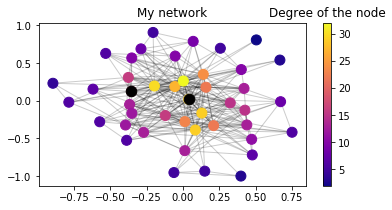

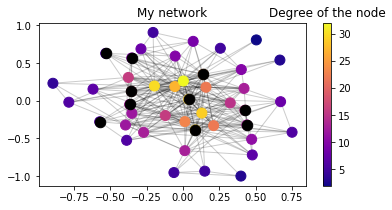

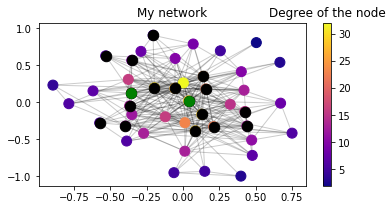

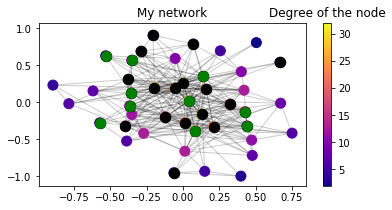

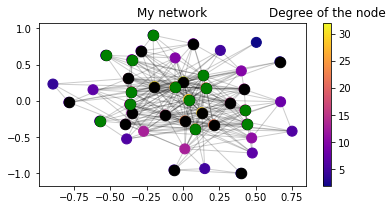

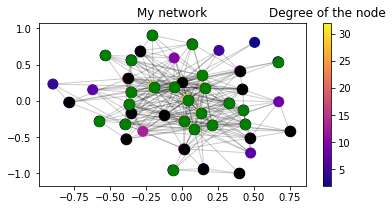

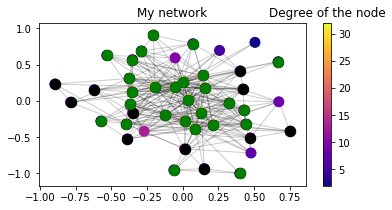

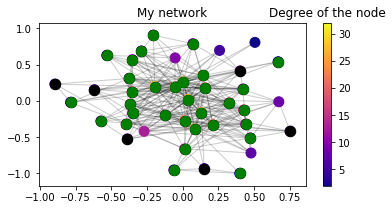

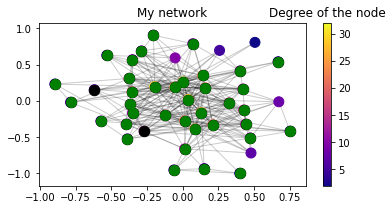

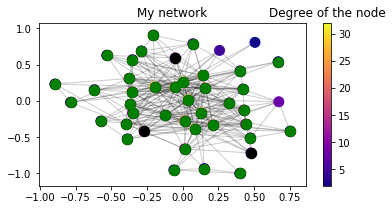

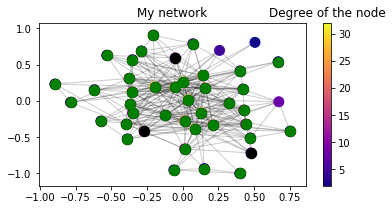

In [51]:

network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')

Out1 = cascade_model(G, starting_nodes =result[0] , time = t, p_infect = pinfect, recovery_time = recover_time, plots = True)

## Large-Degree node Strategy

In [66]:
candidate=highdegree[:len(result[0])] # Picking candidate nodes

In [67]:
candidate

['Konstantin Dmitrievitch Levin',
 'Princess Ekaterina Alexandrovna Shtcherbatsky']

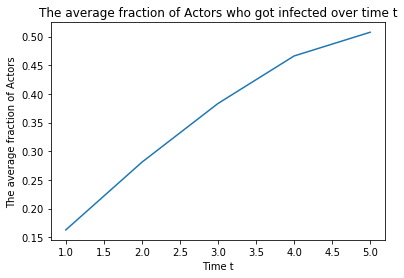

In [76]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')
kres=ICM(G,candidate,p=0.1,m=100,Plot=True)

In [69]:
print('IMC score for high degree Actors: '+ str(kres))

IMC score for high degree Actors: 17.99


C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


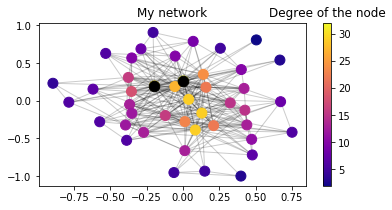

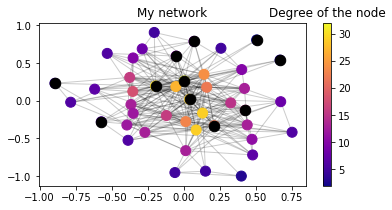

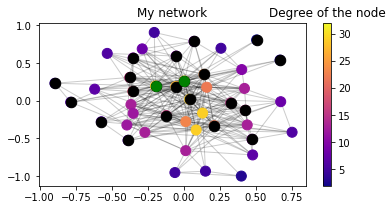

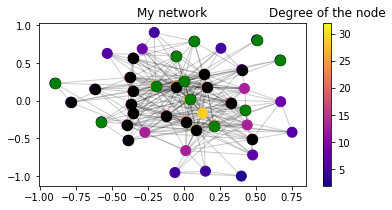

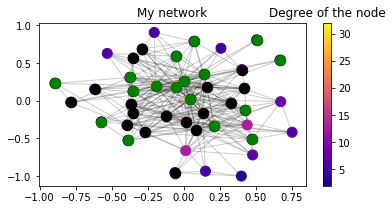

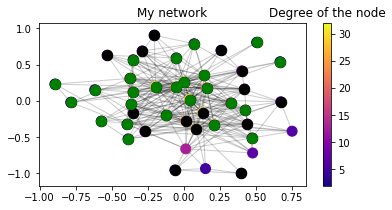

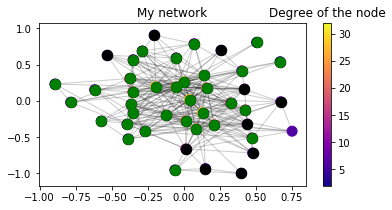

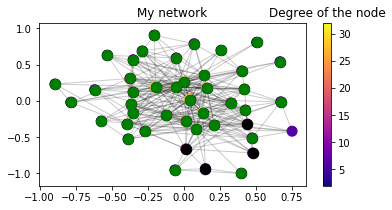

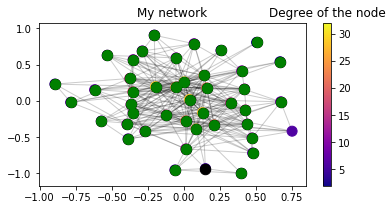

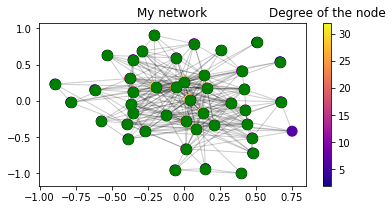

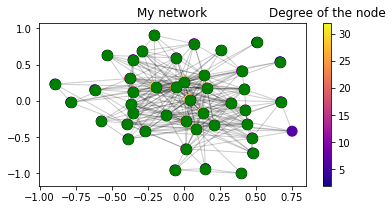

In [70]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')
Out1 = cascade_model(G, starting_nodes =candidate , time = t, p_infect = pinfect, recovery_time = recover_time, plots = True)

## Random Strategy

In [88]:
aList = G.nodes
print ("Choosing k random actors")
sampled_list = random.sample(aList, len(result[0]))
print(sampled_list)

Choosing k random actors
['Anna Arkadyevna Karenin', 'Golenishtchev']


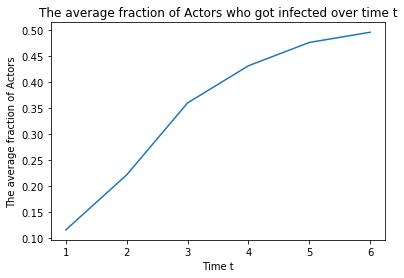

In [78]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')
kres=ICM(G,sampled_list,p=0.1,m=100,Plot=True)

In [79]:
print('IMC score for random Actors: '+ str(kres))

IMC score for random Actors: 17.42


C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Nima\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


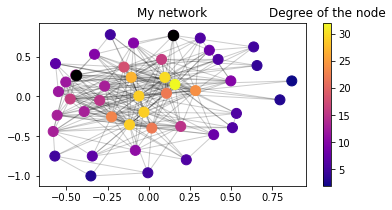

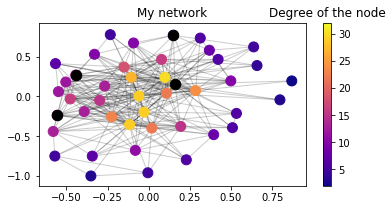

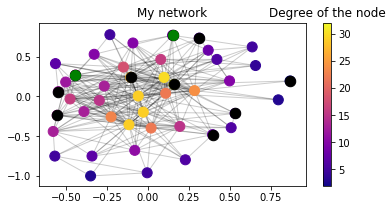

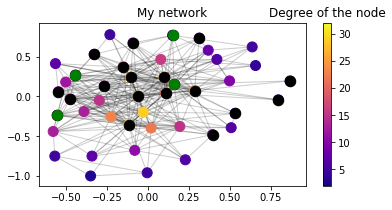

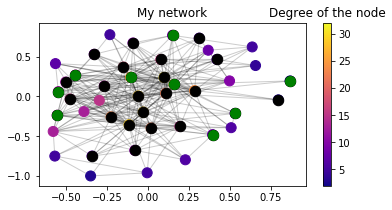

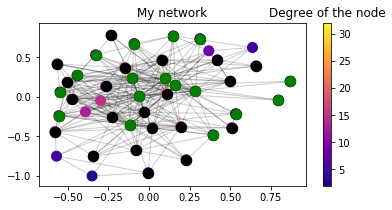

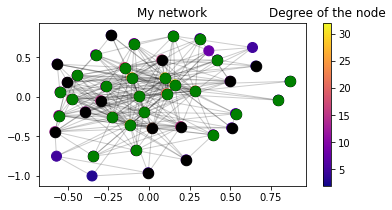

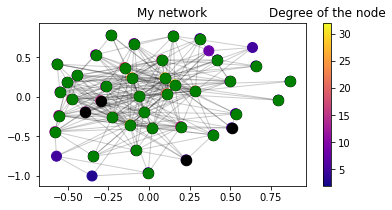

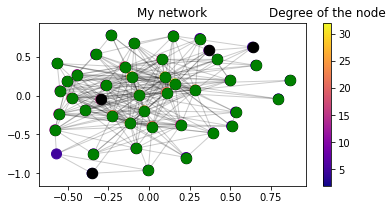

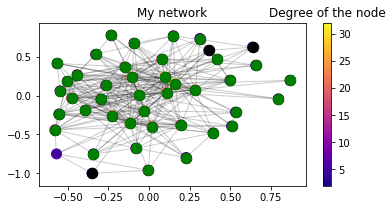

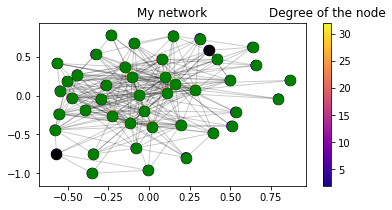

In [156]:
network_file = 'edge_list_Anna.csv'
G=read_edgelist(network_file, delimiter=',')
Out1 = cascade_model(G, starting_nodes =sampled_list , time = t, p_infect = pinfect, recovery_time = recover_time, plots = True)